In [1]:
#importing required libraries
import imageio
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import Image

# Question 2a

In [2]:
#loading environment
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True,render_mode="rgb_array_list")

# Value Iteration

In [3]:
#Value Iteration function(r is discount factor)
def val_iter_f(V,r):
    
    Q = np.zeros((env.observation_space.n,env.action_space.n)) #Value-action function
    
    for state in range(env.observation_space.n):
        for action in range(env.action_space.n):
            info = env.P[state][action]     #gives next states(given state,action) with probabilities and rewards
            for j in range(len(info)):
                next_state = info[j][1]
                p = info[j][0]              #probability P from state to next_state through action
                reward = info[j][2]
                Q[state][action] += p*(reward+r*V[next_state]) #update Q
                
    new_V = np.zeros((env.observation_space.n))
    for state in range(env.observation_space.n):
        new_V[state] = np.max(Q[state,:])  #Using greedy policy
    
    return new_V

In [4]:
#Value Iteration method
def val_iter(env,r,e):
    v0 = np.zeros((env.observation_space.n))
    v1 = val_iter_f(v0,r)
    vi_iter = 1
    while np.linalg.norm(v1-v0)>e:
        v0 = v1
        v1 = val_iter_f(v0,r)
        vi_iter += 1
    
    #Finding corresponding action value function
    Q = np.zeros((env.observation_space.n,env.action_space.n)) #Value-action function
    for state in range(env.observation_space.n):
        for action in range(env.action_space.n):
            info = env.P[state][action]                        #gives next states(given state,action) with probabilities and rewards
            for j in range(len(info)):
                next_state = info[j][1]
                p = info[j][0]                                 #probability P from state to next_state through action
                reward = info[j][2]
                Q[state][action] += p*(reward+r*v1[next_state]) #update Q

    #Finding final policy from value iteration
    vi_policy = np.zeros((env.observation_space.n,env.action_space.n),dtype=int)
    for state in range(env.observation_space.n):
        vi_policy[state][np.argmax(Q[state,:])] = 1
        
    return vi_iter,v1,vi_policy.astype(int)

In [5]:
vi_iter,vi_value,vi_policy = val_iter(env,0.9,0.00001)
print("Iterations required for value iteration to converge is: ",vi_iter)
print("The final policy in value iteration method is: ")
print(vi_policy)

Iterations required for value iteration to converge is:  66
The final policy in value iteration method is: 
[[1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]


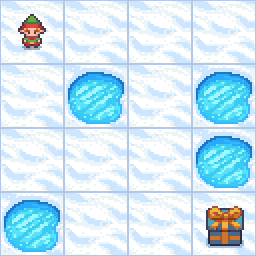

Total number of moves done:  52


In [6]:
#Implementation of final policy in environment
no_moves = 0
state,info = env.reset()
while no_moves<100:
    action = np.argmax(vi_policy[state])
    next_state,reward,terminated,truncated,info = env.step(action)
    no_moves += 1
    state = next_state
    if terminated==True:
        break

frames = env.render()
imageio.mimsave('value_iteration.gif', frames, duration=0.1)
with open('value_iteration.gif','rb') as f:
    display(Image(data=f.read(),format='png'))

if terminated==True:
    print("Total number of moves done: ",no_moves)
else:
    print("Couldn't finish the task within 100 moves")

# Policy Iteration

In [7]:
#policy evaluation(r is discount factor and e is precision threshold) 
def eval_policy(Pol,r,e):
    v0 = np.zeros((env.observation_space.n))
    v1 = np.zeros((env.observation_space.n))
    first_iter = True
    while first_iter or np.linalg.norm(v1-v0)>e:
        first_iter = False
        v0 = v1
        v1 = np.zeros((env.observation_space.n))
        for state in range(env.observation_space.n):
            for action in range(env.action_space.n):
                info = env.P[state][action]
                for j in range(len(info)):
                    p = info[j][0]  #probability
                    next_state = info[j][1]
                    reward = info[j][2]
                    v1[state] += Pol[state][action]*p*(reward+r*v0[next_state])  #iterative update rule
                    
    return v1

In [8]:
#policy improvement(r is discount factor)
def imp_policy(V,r):
    
    Q = np.zeros((env.observation_space.n,env.action_space.n)) #Action-value function
    
    for state in range(env.observation_space.n):
        for action in range(env.action_space.n):
            info = env.P[state][action]                        #gives next states(given state,action) with probabilities and rewards
            for j in range(len(info)):
                next_state = info[j][1]
                p = info[j][0]                                 #probability P from state to next_state through action
                reward = info[j][2]
                Q[state][action] += p*(reward+r*V[next_state]) #update Q
                
    Pol = np.zeros((env.observation_space.n,env.action_space.n))
    for state in range(env.observation_space.n):
        Pol[state][np.argmax(Q[state,:])] = 1                     #Using greedy policy
    
    return Pol

In [9]:
#Policy Iteration Method
def pol_iter(env,r,e):
    p0 = np.full((env.observation_space.n,env.action_space.n),0.25)
    value = eval_policy(p0,r,e)
    p1 = imp_policy(value,r)
    pi_iter = 1
    while np.linalg.norm(p1-p0)>e:
        p0 = p1
        value = eval_policy(p0,r,e)
        p1 = imp_policy(value,r)
        pi_iter += 1
    return pi_iter,p1.astype(int)

In [10]:
pi_iter,pi_policy = pol_iter(env,0.9,0.00001)
print("Iterations required for Policy Iteration to converge is: ",pi_iter)
print("The final policy in Policy Iteration method is:")
print(pi_policy)

Iterations required for Policy Iteration to converge is:  2
The final policy in Policy Iteration method is:
[[1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]


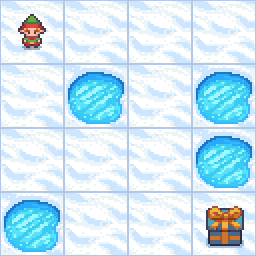

Total number of moves done:  27


In [11]:
#Implementation of final policy in environment
no_moves = 0
state,info = env.reset()
while no_moves<100:
    action = np.argmax(pi_policy[state])
    next_state,reward,terminated,truncated,info = env.step(action)
    no_moves += 1
    state = next_state
    if terminated==True:
        break
env.close()

frames = env.render()
imageio.mimsave('policy_iteration.gif', frames, duration=0.1)
with open('policy_iteration.gif','rb') as f:
    display(Image(data=f.read(),format='png'))

if terminated==True:
    print("Total number of moves done: ",no_moves)
else:
    print("Couldn't finish the task within 100 moves")

# Question 2b

Both algorithms converged to the same optimal policy but Policy Iteration method converged in lesser number of iterations than Value Iteration method 

In [12]:
#function to plot the optimal policy
def plot_policy(pol,grid_size):
    cols = grid_size
    rows = grid_size
    plt.figure(figsize=(cols, rows))
    for row in range(rows):
        for col in range(cols):
            plt.gca().add_patch(plt.Rectangle((col, row), 1, 1, fill=None, color='black'))
            action = np.argmax(pol[row*grid_size+col,:])   #action to be taken when state is row*grid_size+col
            if action==0:    #left
                plt.arrow(col + 0.5, row + 0.5,-0.2,0 , head_width=0.1, head_length=0.1, fc='blue', ec='blue') 
            elif action==1:  #down
                plt.arrow(col + 0.5, row + 0.5, 0,0.2, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action==2:  #right
                plt.arrow(col + 0.5, row + 0.5, 0.2,0, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action==3:  #up
                plt.arrow(col + 0.5, row + 0.5, 0,-0.2, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    plt.xlim(0, cols)
    plt.ylim(0, rows)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()

Optimal path using value iteration is shown below:


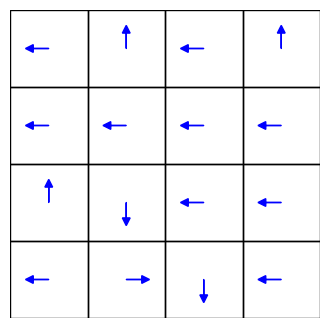

In [13]:
#Optimal path using value iteration
print("Optimal path using value iteration is shown below:")
plot_policy(vi_policy,4)

Optimal path using policy iteration is shown below:


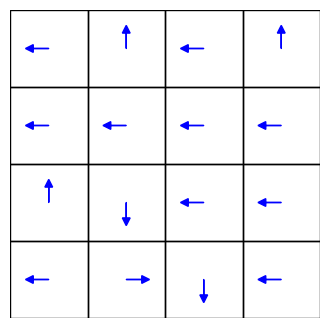

In [14]:
#Optimal path using policy iteration
print("Optimal path using policy iteration is shown below:")
plot_policy(pi_policy,4)

We can see that the final optimal path in both the algorithms is the same.

# Question 2c

- There can be stochastic optimal policies in some environments.
- Using greedy strategy we take one action where action value function is high but there could be many actions with same value.
- Hence there could be some stochastic optimal policies.

# Question 2d

# Creating Custom Environment

In [15]:
import gym
from gym import spaces
import pygame
from pygame.locals import QUIT
import sys

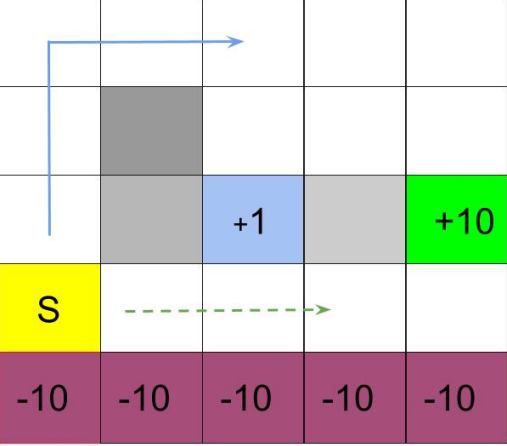

In [16]:
Image("Custom_Grid.png")

- The grid has two terminal states with positive payoff (+1 and +10). 
- The bottom row is a cliff where each state is a terminal state with negative payoff (-10).
- The greyed squares in the grid are walls. 
- The agent starts from the yellow state S. As usual, the agent has four actions A = (Left, Right, Up, Down) to choose from any non-terminal state and the actions that take the agent off the grid leaves the state unchanged. 
- Notice that, if agent follows the dashed path, it needs to be careful not to step into any terminal state at the bottom row that has negative payoff.

In [17]:
class CustomGrid(gym.Env):
    def __init__(self, noise_factor=0.2):
        # Define the dimensions of the grid
        self.grid_size = 5
        self.start_state = 15  # Start state is the first cell (0-indexed)
        self.goal_states = [12, 14]  # You can add multiple goal states
        self.trap_states = [20, 21, 22, 23, 24]  # You can add multiple trap states
        self.obstacle_states = [6, 11, 13]  # Obstacle states
        self.noise_factor = noise_factor
        
        # Define the action space (up, down, left, right)
        self.action_space = spaces.Discrete(4)

        # Define the observation space (single integer state)
        self.observation_space = spaces.Discrete(self.grid_size * self.grid_size)

        # Defining P (state transition probabilities and rewards)
        self.P = {}
        movements = [(0,-1),(1,0),(0,1),(-1,0)]
        for state in range(self.observation_space.n): 
            row = state//self.grid_size
            col = state%self.grid_size
            act_dict = {}
            if (state in self.obstacle_states) or (state in self.goal_states) or (state in self.trap_states):
                for action in range(self.action_space.n):
                    act_dict[action] = [(1,state,0,True)]
                self.P[state] = act_dict
                continue
            for action in range(self.action_space.n):
                info = []
                for i in range(self.action_space.n):
                    #probability determination
                    if i==action:
                        p = 1-self.noise_factor
                    else:
                        p = self.noise_factor/(self.action_space.n-1)
                    #next state determination
                    new_row = row + movements[i][0]
                    new_col = col + movements[i][1]
                    if new_row*self.grid_size+new_col not in self.obstacle_states and new_row>=0 and new_row<self.grid_size and new_col>=0 and new_col<self.grid_size:
                        next_state = new_row*self.grid_size+new_col
                    else:
                        next_state = state
                    #reward determination
                    if next_state==12:
                        reward = 1
                    elif next_state==14:
                        reward = 10
                    elif next_state in self.trap_states:
                        reward = -10
                    else:
                        reward = 0
                        
                    info.append([p,next_state,reward,(next_state in self.goal_states) or (next_state in self.trap_states)])
                act_dict[action] = info  #setting value of each action in P[state] dictionary
            self.P[state] = act_dict     #setting value of each action in P dictionary

    def reset(self):
        # Reset the agent's state to the starting state
        self.agent_state = self.start_state
        return self.agent_state, {}

    def step(self, action):
        # Define possible movements
        movements = [(0,-1),(1,0),(0,1),(-1,0)]

        # Introduce stochasticity by applying a noisy action
        if np.random.random() < self.noise_factor:
            action = self.action_space.sample()

        # Calculate the new state based on the action
        new_row = self.agent_state//self.grid_size + movements[action][0]
        new_col = self.agent_state%self.grid_size + movements[action][1]

        # Check if the new state is valid and within the grid
        if new_row*self.grid_size+new_col not in self.obstacle_positions:
            if new_row>=0 and new_row<self.grid_size and new_col>=0 and new_col<self.grid_size:
                self.agent_state = new_row*self.grid_size+new_col

        # Check if the agent has reached a goal
        terminated = (self.agent_state in self.goal_states) or (self.agent_state in self.trap_states)

        # Check if the agent has made the maximum number of allowed moves
        truncated = (self.moves > 150)

        # Calculate the reward
        if self.agent_state==12:
            reward = 1
        elif self.agent_state==14:
            reward = 10
        elif self.agent_state in self.trap_states:
            reward = -10
        else:
            reward = 0

        return self.agent_state, reward, terminated, truncated, {}

    def render(self, mode='rgb_array_list'):
        pass

#loading environment
env = CustomGrid()

# Value Iteration for different cases

Optimal Policy for 0.01 noise factor and 0.99 discount is:


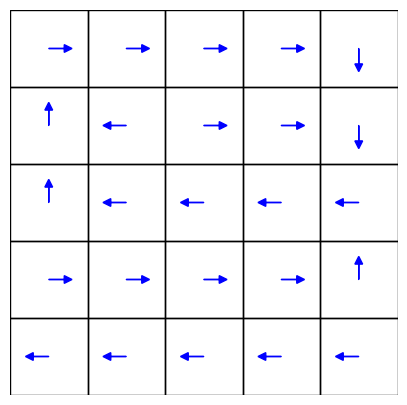

Optimal Policy for 0.01 noise factor and 0.1 discount is:


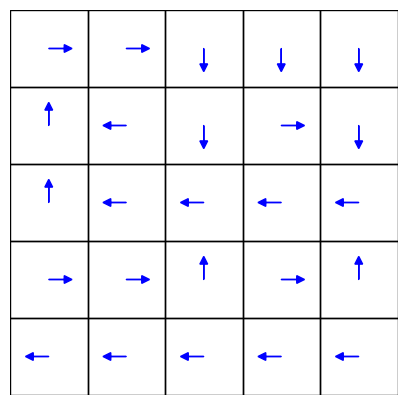

Optimal Policy for 0.2 noise factor and 0.99 discount is:


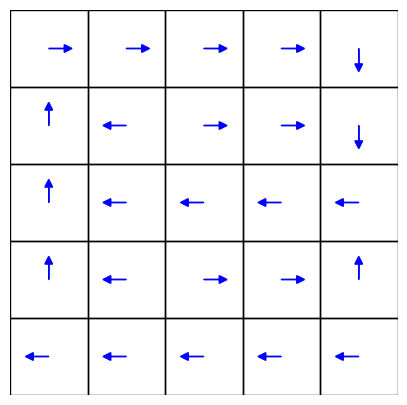

Optimal Policy for 0.2 noise factor and 0.1 discount is:


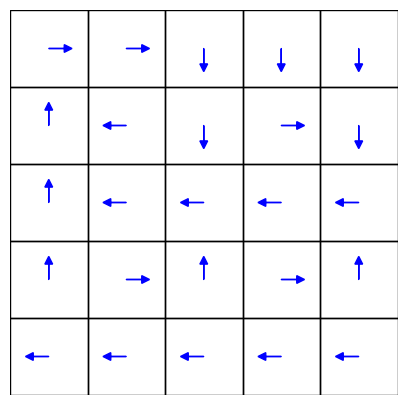

In [18]:
#low noise
env = CustomGrid(noise_factor=0.01)

vi_iter,vi_value,vi_policy = val_iter(env,0.99,0.00001)
print("Optimal Policy for 0.01 noise factor and 0.99 discount is:")
plot_policy(vi_policy,grid_size=5)

vi_iter,vi_value,vi_policy = val_iter(env,0.1,0.00001)
print("Optimal Policy for 0.01 noise factor and 0.1 discount is:")
plot_policy(vi_policy,grid_size=5)

#high_noise
env = CustomGrid(noise_factor=0.2)

vi_iter,vi_value,vi_policy = val_iter(env,0.99,0.00001)
print("Optimal Policy for 0.2 noise factor and 0.99 discount is:")
plot_policy(vi_policy,grid_size=5)

vi_iter,vi_value,vi_policy = val_iter(env,0.1,0.00001)
print("Optimal Policy for 0.2 noise factor and 0.1 discount is:")
plot_policy(vi_policy,grid_size=5)

- We can observe that for higher noise values, optimal policy goes from upper side of obstacles since there is high risk of falling into cliff in the bottom row.  
- For low noise ,it is safe enough to go from bottom since there is less risk of deviating from actual action taken.
- Also, for higher discount factor optimal policy goes to terminal state with reward 10 even though its distant.
- Lower discount makes it go to terminal state with reward 1 as it is only concerned with immediate results and reward 1 is closer. 

As discussed in previous assignment, changing discount factor can change optimal policy which is shown above.